# User Guide

## Obtaining the Data Store

After [installation](start.md#installation) and once you have your 
[credentials](start.md#credentials) at hand, you can use the SMOS data store 
using its class exported by the `xcube_smos.store` module:

In [1]:
from xcube_smos.store import SmosDataStore

store = SmosDataStore(key="your access key", 
                      secret="your secret")

You can avoid passing the `key` and `secret` arguments if you set the 
environment variables `CREODIAS_S3_KEY` and `CREODIAS_S3_SECRET` accordingly.

However, the preferred way to obtain the store object is by its name `"smos"` 
and using the xcube `new_data_store()` function, because many other xcube 
data stores can be used in the same way:

In [2]:
import os
from xcube.core.store import new_data_store

store = new_data_store("smos", 
                       key=os.environ["CREODIAS_S3_KEY"], 
                       secret=os.environ["CREODIAS_S3_SECRET"])

You can avoid passing the `key` and `secret` arguments if you set the 
environment variables `CREODIAS_S3_KEY` and `CREODIAS_S3_SECRET` accordingly.

## Data Store Parameters

The data store parameters you can pass to the `new_data_store()` function depend on the
data store identifier used. For the data store named  `"smos"` the following arguments
can be provided:

| Name | Type | Description | 
|------|------|-------------|
| `source_path` | `str` | Path or URL into SMOS archive filesystem. |
| `source_protocol` | `str` | Protocol name for the SMOS archive filesystem. |
| `source_storage_options` | `dict` | Storage options for the SMOS archive filesystem. |
| `cache_path` | `str` | Path to local cache directory. Must be given, if file caching is desired. |
| `xarray_kwargs`| `dict` | Extra keyword arguments accepted by xarray.open_dataset. |
| `**source_storage_options_kwargs`| `dict` | keyword-argument form of `source_storage_options` |

Because of `**source_storage_options_kwargs` we can pass storage options directly to the
`new_data_store()` call, such as:

* `key`: Access key identifier for the CREODIAS storage 
* `secret`: Secret access key for the CREODIAS storage

## Data Access

All xcube data stores provide a `open_data()` method to access the data.
It has one required positional argument `data_id` which identifies the
data(set) to be opened. The SMOS store provides two datasets, they are

* `"SMOS-L2C-SM"` - SMOS Level-2C Soil Moisture
* `"SMOS-L2C-OS"` - SMOS Level-2C Ocean Salinity

The SMOS data store also requires another argument `time_range` that 
specifies temporal coverage as start/stop dates, here just 2 days:

In [5]:
datacube = store.open_data("SMOS-L2C-SM", 
                           time_range=["2024-01-01", "2024-01-02"])

<xarray.Dataset>
Dimensions:            (time: 31, lat: 4032, lon: 8192, bnds: 2)
Coordinates:
  * lat                (lat) float64 88.57 88.53 88.48 ... -88.48 -88.53 -88.57
  * lon                (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time               (time) datetime64[ns] 2024-01-01T00:27:26.980000 ... 2...
    time_bnds          (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    Chi_2              (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Chi_2_P            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    N_RFI_X            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    N_RFI_Y            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    RFI_Prob           (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Soil_Moisture      (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Soil_Moisture_DQX  (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>

We reveived a global dataset with 

In [ ]:
datacube

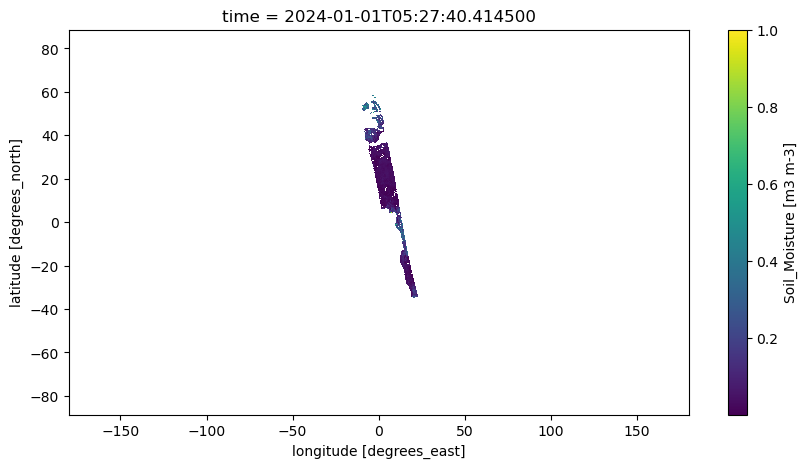

In [11]:
datacube.Soil_Moisture.isel(time=4).plot.imshow(figsize=(10, 5))

The xcube data store framework , the different data representations 
are provided by dedicated _data openers_. Hence, a common and optional 
argument is `opener_id`, which is used to control how the data is 
represented. The SMOS data store can currently provide three 
different representations of SMOS data addressing different use cases:

* `"dataset:zarr:smos"` (the default) - represent data as a datacube including 
   all observations in the given time range at a fixed spatial resolution;
* `"mldataset:zarr:smos"` - represent data as a multi-resolution datacube 
   including all observations in the given time range including 5 spatial 
   resolution levels;
* `"smosdsiter:zarr:smos"` - represent data as an iterator providing datasets 
   for all the observations in the given time range at a fixed spatial 
   resolution.

### Datacube Parameters

The following parameters are common to all data openers:

* `time_range`: 
  The time range `(start, stop)` given as pair of start and stop dates 
  either as `tuple` or `list` of `str`. 
  Dates must be given using format `"YYYY-MM-DD"`. 
  Start and stop are inclusive.
* `bbox`: Bounding box in geographical coordinates given as `(x1,y1, x2,y2)` 
  either as `tuple` or `list` of `float`.
* `res_level`: Spatial resolution level in the range 0 to 4. 
  Actual resolution in degrees is . 
  Defaults to `0`. 
  Not applicable to opener type `"mldataset:zarr:smos"`.
* `l2_product_cache_size`: Size of the SMOS L2 product cache given as 
  maximum number of SMOS L2 products to be cached in memory.
  Can drastically improve performance if you need random access datacubes.
  Applies to opener type `"mldataset:zarr:smos"` only.

### Common Access Parameters

### Datacube

### Multi-Resolution Datacube

In [ ]:
Additional 

### Dataset Iterators

## Parameter Schemas

This section describes how the various parameters used by SMOS data store
can be inspected programmatically.

### Schema for the Data Store Parameters

The xcube function `get_data_store_params_schema()` outputs the allowed parameters 
for a given data store as a JSON Schema object:

In [12]:
from xcube.core.store import get_data_store_params_schema

schema = get_data_store_params_schema("smos")
schema

In [19]:
# For example:
for p_name, p_schema in schema.properties.items():
    print(f"* `{p_name}: {p_schema.type} - {p_schema.description or p_schema.title}")

* `time_range: array - Time range given as pair of start and stop dates. Dates must be given using format 'YYYY-MM-DD'. Start and stop are inclusive.
* `bbox: array - Bounding box [x1,y1, x2,y2] in geographical coordinates
* `res_level: integer - Spatial resolution level in the range 0 to 4. Zero refers to the max. resolution of 0.0439453125 degrees.


You can use `schema.to_dict()` get a JSON-serializable dictionary.

### Schema for the Open Parameters

Using the `store.get_open_data_params_schema()` method you can inspect 
the allowed parameters for the `store.open_data()` method, which is 
used to open SMOS datacubes.

In [20]:
schema = store.get_open_data_params_schema(opener_id="dataset:zarr:smos")
schema

In [21]:
for p_name, p_schema in schema.properties.items():
    print(f"* `{p_name}: {p_schema.type} - {p_schema.description or p_schema.title}")

* `time_range: array - Time range given as pair of start and stop dates. Dates must be given using format 'YYYY-MM-DD'. Start and stop are inclusive.
* `bbox: array - Bounding box [x1,y1, x2,y2] in geographical coordinates
* `res_level: integer - Spatial resolution level in the range 0 to 4. Zero refers to the max. resolution of 0.0439453125 degrees.
